# EDA 2
The purpose of this EDA is to uncover any trends that weren't covered in the Raw EDA notebook. This includes looking at numeric variables relationships. Looking for potentially confounding variables. 

This notebook also gives me an opportunity to reexamine Age and Gender after I made changes to the variables

In [1]:
# Import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency #(Chi square test)

In [2]:
#Load Datasets

diabetes=pd.read_csv('../dataset/diabetes_cleaned.csv')

In [3]:
#Checking proper dataset loaded in

diabetes

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,45-64,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,45-64,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,45-64,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,65-74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,45-64,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97982,45-64,Male,Other,Graduate,Upper-Middle,Unemployed,Former,1,136,8.3,...,45,150,116,113,109,14.58,5.55,26.0,Pre-Diabetes,0
97983,18-44,Female,White,Graduate,Middle,Employed,Never,3,76,8.8,...,55,123,146,96,146,9.02,5.97,24.4,Pre-Diabetes,0
97984,45-64,Female,Black,No formal,Upper-Middle,Employed,Former,4,121,9.9,...,50,111,184,93,132,2.57,5.21,27.6,No Diabetes,0
97985,45-64,Female,Black,Highschool,Lower-Middle,Retired,Never,3,52,5.9,...,68,91,116,106,117,9.81,5.53,26.4,Pre-Diabetes,0


In [7]:
diabetes['gender'].value_counts()

gender
Female    50216
Male      47771
Name: count, dtype: int64

Still higher amount of Female patients then Male patients. With 51.2% being Female and 48.8% being Male.

In [8]:
diabetes['age'].value_counts()

age
45-64    44201
18-44    35808
65-74    11784
75-84     4651
85+       1543
Name: count, dtype: int64

The age distributions are slightly more interesting. Since I am unsure the country of origin of the dataset I just based the average human lifespan at 73 years old (global lifespan). Based on this roughly 93.6% (Included all off 65-74 age group in calculation) of the population is included. I did find it interesting how 45-64 has the highest patient count. You would think 18-44 would have the highest patient count just based on how many years are encompassed in the group. However, it only has the second most.

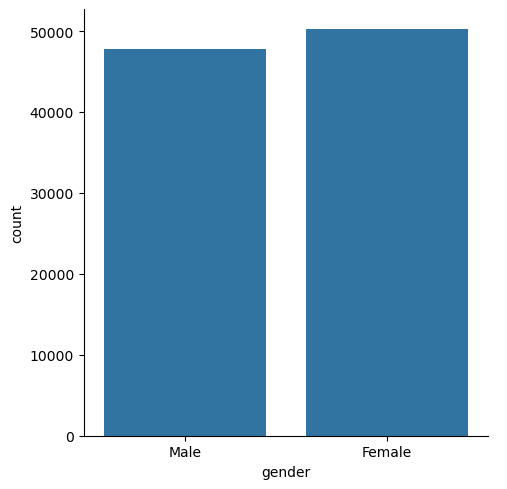

In [12]:
sns.catplot(x="gender", kind="count", data=diabetes)

In [21]:
pd.crosstab(diabetes['gender'], diabetes['diagnosed_diabetes'], normalize='index')

diagnosed_diabetes,0,1
gender,,
Female,0.401545,0.598455
Male,0.399343,0.600657


<Axes: xlabel='gender', ylabel='count'>

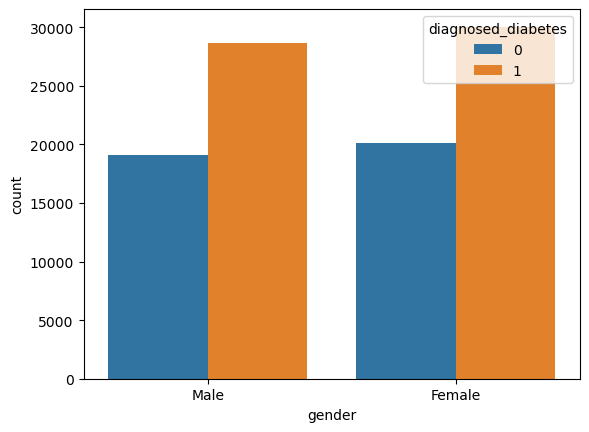

In [22]:
sns.countplot(x='gender', hue='diagnosed_diabetes', data=diabetes)


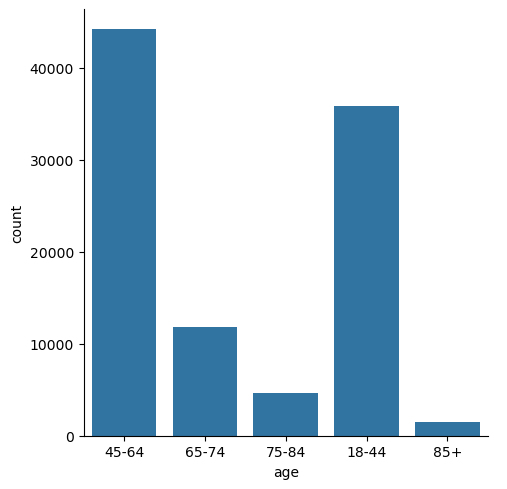

In [13]:
sns.catplot(x='age',kind='count',data=diabetes)

In [19]:
pd.crosstab(diabetes['age'], diabetes['diagnosed_diabetes'], normalize='index')

diagnosed_diabetes,0,1
age,,
18-44,0.470621,0.529379
45-64,0.384471,0.615529
65-74,0.313221,0.686779
75-84,0.282090,0.717910
85+,0.254051,0.745949


<Axes: xlabel='age', ylabel='count'>

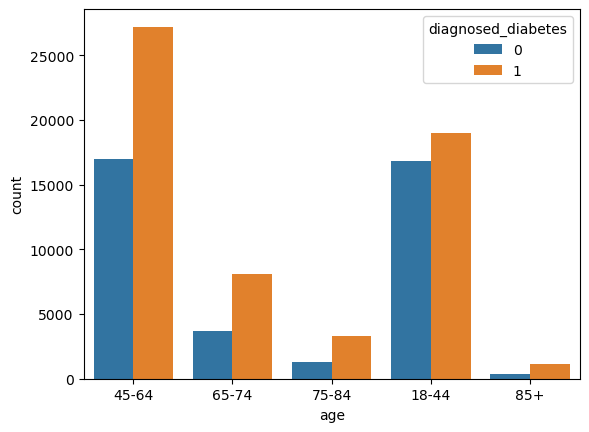

In [20]:
sns.countplot(x='age', hue='diagnosed_diabetes', data=diabetes)


In [23]:
diabetes['diagnosed_diabetes'].value_counts()

diagnosed_diabetes
1    58746
0    39241
Name: count, dtype: int64

Based on the diagnosed_diabetes dataset distribution. We can infer that gender doesn't have an impact on diabetes diagnoses, due to the fact that ratio of patients diagnosed with diabetes follows roughly the same ratio across both genders, (60% diagonsed with diabetes and 40% that does not have diabetes.

Age on the other hand, has shown that it impacts the diabetes diagnoses. As the age groups increase the ratio of patient diabetes diagnoses actually increases, with older patients showning more diabetes diagnoses. It is to be noted that there is a population difference between the age groups. As older patients also have a smaller sample of patients. Because of this, there might be misrepresentation.